### MODELS

### Linear model
- Простые и **Интерпретируемые** 
- Модель называют линейной, если она является линейной по этим численным признакам.
- Работает только с **численными** признаками

### Линейная регрессия и метод наименьших квадратов (МНК)

Пусть у нас задан датасет $(X, y)$, где 

$$
y = (y_i)_{i=1}^N \in \mathbb{R}^N
$$

— вектор значений целевой переменной, а

$$
X = (x_i)_{i=1}^N \in \mathbb{R}^{N \times D}, \quad x_i \in \mathbb{R}^D
$$

— матрица "объект-признак", где i-я строка — это вектор признаков i-го объекта выборки.  

Мы хотим моделировать зависимость $y_i$ от $x_i$ как линейную функцию со свободным членом:

$$
f_w(x_i) = \langle w, x_i \rangle + w_0
$$

где $w \in \mathbb{R}^D$ — вектор весов, а $w_0 \in \mathbb{R}$ — свободный член (bias).

Используя Mean Squared Error, мы хотим оптимизировать Минимизируем по \( w \):

$$
\min_{w} \| y - X w \|_2^2
$$




### Аналитический метод МНК
Аналитическое решение:

$$
w = (X^T X)^{-1} X^T y
$$

Вычислительная сложность:

$$
O(D^2 N + D^3)
$$

где \(N\) — размер выборки, \(D\) — число признаков.  
- \(ND^2\) — сложность перемножения матриц \(X^T X\) и \(X^T y\),  
- \(D^3\) — сложность обращения матрицы.  

Рекомендации: не перемножайте \((X^T X)^{-1}\) и \(X^T\) напрямую; лучше сначала умножить \(X^T y\), а потом умножить на \((X^T X)^{-1}\).  

Проблемы точного решения:  
- Обращение больших матриц вычислительно дорого, особенно при миллионах объектов.  
- Матрица \(X^T X\) может быть плохо обусловлена, что делает решение численно нестабильным: малые изменения \(y\) могут сильно менять \(w\).  

Для ускорения и стабильности используют итерационные методы или продвинутые алгоритмы перемножения матриц.


### Приближенный Численный метод МНК
### Градиентный спуск для линейной регрессии  

Функция потерь:  

$$
L(w) = \frac{1}{N} \|Xw - y\|^2
$$  

Градиент:  

$$
\nabla_w L = \frac{2}{N} X^T (Xw - y)
$$  

Правило обновления весов:  

$$
w \leftarrow w - \alpha \nabla_w L
$$  




In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np

np.random.seed(42)
X = np.random.randn(100, 2)   
w_true = np.array([3, -2]) 
y = X @ w_true + np.random.randn(100) * 0.5
model = LinearRegression()  
model.fit(X, y)

print("Оцененные веса (sklearn):", model.coef_)
print("Истинные веса:", w_true)


Оцененные веса (sklearn): [ 3.09536017 -2.08607105]
Истинные веса: [ 3 -2]


## Логистическая регрессия  

Логистическая регрессия используется для **бинарной классификации**.  
Модель предсказывает вероятность принадлежности объекта к классу 1:  

$$
\hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}}, \quad z = Xw
$$  

где $\sigma(z)$ — **сигмоида**.  



###  Функция потерь (логистическая)  

Используется **логарифмическая функция потерь (log-loss, бинарная кросс-энтропия)**:  

$$
L(w) = -\frac{1}{N} \sum_{i=1}^{N} \Big[ y_i \log \hat{y}_i + (1 - y_i) \log (1 - \hat{y}_i) \Big]
$$  








### SVM (Support Vector Machine)

### Интуиция  
Eсть точки двух классов (например, красные и синие) на плоскости.  
Задача: провести линию, которая **разделит классы**.  

Но линий (гиперплоскостей) можно провести бесконечно много.  
**SVM выбирает ту, которая даёт максимальный зазор (margin)** — то есть максимально далеко от ближайших точек каждого класса.  

Эти ближайшие точки называются **опорные вектора (support vectors)** — они «держат» границу. Если их убрать/сдвинуть, граница изменится.  

###  Жёсткий и мягкий SVM  
- Если классы идеально разделимы → жёсткий SVM (строгое разделение).  
- Если есть ошибки/шум → мягкий SVM, допускаем ошибки, но контролируем их через параметр **C**:  
  - большой **C** → жёстче к ошибкам (больше шанс переобучения),  
  - маленький **C** → больше ошибок, но более гладкая граница (сильнее регуляризация).  


### Что делать, если классы не линейно разделимы?  
SVM использует **ядровой трюк (kernel trick)**:  
- Признаки «переносятся» в более высокое измерение, где классы уже разделимы.  
- Самые популярные ядра:  
  - **линейное** (просто линия/гиперплоскость),  
  - **RBF (Gaussian)** — даёт «кривые» границы,  
  - **полиномиальное**.  


###  Отличие от логистической регрессии  
- Логистическая регрессия → считает вероятности (0–1).  
- SVM → ищет границу с максимальным запасом (margin), по умолчанию не даёт вероятности.  


### Когда SVM хорош?  
Когда выборка **небольшая/средняя**, но **признаков много** (например, текст, TF-IDF).  
Когда нужно «чисто разделить» данные и важна красивая граница.  
Когда данных **очень много** (миллионы строк) — ядровой SVM становится слишком медленным.  



In [ ]:
# Импортируем библиотеки
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

X, y = make_classification(n_samples=200, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[18  5]
 [ 1 16]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.78      0.86        23
           1       0.76      0.94      0.84        17

    accuracy                           0.85        40
   macro avg       0.85      0.86      0.85        40
weighted avg       0.87      0.85      0.85        40



## Многоклассовая классификация 

### 1 One-vs-Rest (OvR, «один против всех»)

### Идея
- Для K классов обучаем K бинарных классификаторов.  
- Каждый классификатор решает: «Этот класс vs все остальные».  
- Пример: класс 1 против классов 2, 3, 4… K.  

### Предсказание
- На этапе предсказания каждый классификатор выдаёт score (логит или вероятность).  
- Класс с наибольшим score выбирается как итоговый:  

$$
\hat{y} = \arg\max_k f_k(x)
$$

### Плюсы
- Простая реализация.  
- Подходит для большинства моделей, включая логистическую регрессию.  
- Быстро обучается при небольшом числе классов.  

### Минусы
- Дисбаланс: каждый классификатор видит один положительный класс и много отрицательных, что может ухудшить качество.  
- Границы между классами могут быть не согласованы (несколько классификаторов могут сильно «хотеть» отнести объект к своему классу).  



### 2️ One-vs-One (OvO, «каждый против каждого»)

### Идея
- Для $K$ классов обучаем $K(K-1)/2$ бинарных классификаторов, каждый решает задачу «класс i против класса j».  
- Пример: при 4 классах мы обучаем модели: (1vs2, 1vs3, 1vs4, 2vs3, 2vs4, 3vs4).  

### Предсказание
- Для нового объекта каждая модель выдаёт свой «выбор».  
- Итоговый класс выбирается через голосование (класс, получивший больше всего голосов).  

### Плюсы
- Каждая модель видит только два класса, легче разделять их.  
- Часто работает лучше для SVM и небольшого числа классов.  

### Минусы
- При большом $K$ количество моделей растёт быстро ($K(K-1)/2$), обучение и хранение становятся дорогими.  
- Нужно объединять результаты голосованием, что может быть чуть сложнее в реализации.  


### 3 Softmax / Мультиномиальная логистическая регрессия

### Идея
- Обобщение логистической регрессии на несколько классов.  
- Для каждого класса $k$ обучаем вектор весов $w_k$, и предсказания — через softmax:

$$
P(y=k \mid x) = \frac{e^{w_k^T x}}{\sum_{j=1}^{K} e^{w_j^T x}}
$$

- Функция потерь — кросс-энтропия для многоклассового случая:

$$
L = - \frac{1}{N} \sum_{i=1}^{N} \sum_{k=1}^{K} \mathbf{1}\{y_i=k\} \log P(y=k \mid x_i)
$$

### Предсказание
- Класс с наибольшей вероятностью выбирается как итоговый:

$$
\hat{y} = \arg\max_k P(y=k \mid x)
$$

### Плюсы
- Естественный способ работать с вероятностями для нескольких классов.  
- Одновременно обучает все классы, границы согласованы.  
- Подходит для линейной и логистической регрессии.  

### Минусы
- Линейная граница (без feature engineering или нелинейных признаков).  
- Требует решения одной оптимизационной задачи, что иногда медленнее, чем OvR.



c:\Users\k4ty2\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


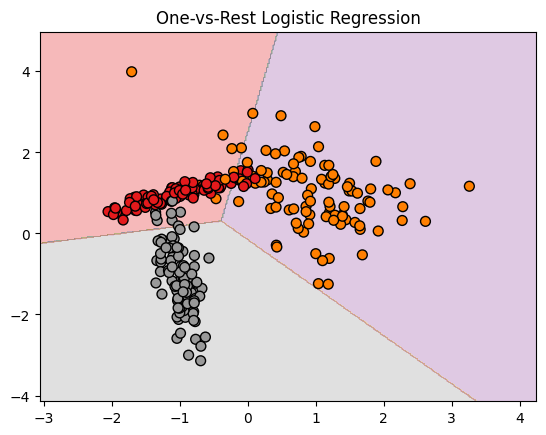

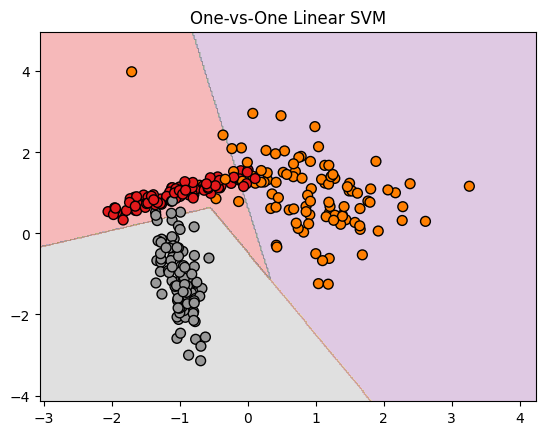

c:\Users\k4ty2\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


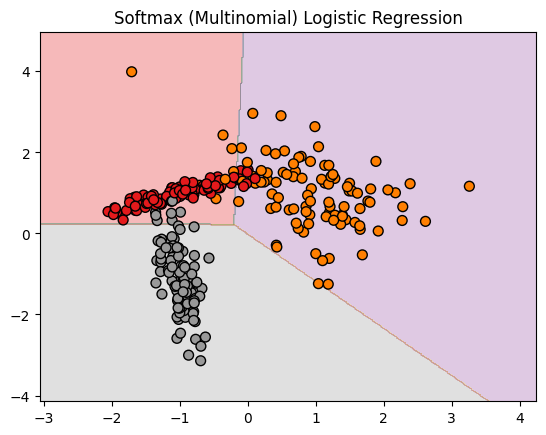

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Генерация синтетических 2D-данных с 3 классами
X, y = make_classification(n_samples=300, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1, n_classes=3, random_state=42)

# Функция для визуализации
def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Set1, edgecolor='k')
    plt.title(title)
    plt.show()

# --- 1. OvR Logistic Regression ---
ovr_lr = LogisticRegression(multi_class='ovr', solver='lbfgs')
ovr_lr.fit(X, y)
plot_decision_boundary(ovr_lr, X, y, "One-vs-Rest Logistic Regression")

# --- 2. OvO SVM ---
ovo_svm = SVC(decision_function_shape='ovo', kernel='linear')
ovo_svm.fit(X, y)
plot_decision_boundary(ovo_svm, X, y, "One-vs-One Linear SVM")

# --- 3. Softmax Logistic Regression ---
softmax_lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
softmax_lr.fit(X, y)
plot_decision_boundary(softmax_lr, X, y, "Softmax (Multinomial) Logistic Regression")


### Naive Bayes Classifier
- Goal: given a set of training data points from 𝐶 classes, compute the predictive probabilities for each of the 𝐶 potential classes

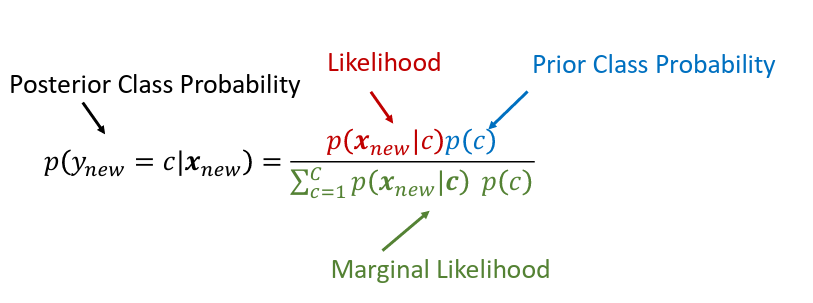

- Independence Assumption: predictors are are conditionally independent given the target

$$
p(x_1, x_2, \dots, x_n \mid c) = \prod_{i=1}^n p(x_i \mid c)
$$

#### Advantages
- It is easy and fast to predict class of test data set. It also perform well in multi class prediction 
- When assumption of independence holds, a Naive Bayes classifier performs better compare to other models like logistic regression and you need less training data. 
- Allows online learning


#### Disadvantages
- If a predictor was not observed in training data set, then model will assign a 0 (zero) probability and will be unable to make a prediction. This is often known as “Zero Frequency”. 
- Solution: To solve this, we can use the smoothing technique. One of the simplest smoothing techniques is called Laplace estimation.
#### Laplace Smoothing

**Definition:**  

With Laplace smoothing, the probability can be written as:

$$
P(w' \mid \text{positive}) = \frac{\text{count}(w', y=\text{positive}) + \alpha}{N + \alpha K}
$$

Where:  
- $\alpha$ — the smoothing parameter (usually $\alpha = 1$).  
- $K$ — the number of features (size of the vocabulary).  
- $N$ — the total count of words (or features) in documents with $y = \text{positive}$.  
- $\text{count}(w', y=\text{positive})$ — the number of times word $w'$ appears in positive class documents.  


**Intuition:**  
If we choose $\alpha \neq 0$, the probability will never be zero, even if a word does not appear in the training dataset. This makes the model more robust.  



In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

# Загружаем датасет
X, y = load_iris(return_X_y=True)

# Делим на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Наивный Байес
nb = GaussianNB()
nb.fit(X_train, y_train)

# Предсказания
y_pred = nb.predict(X_test)

# Метрики
print("Naive Bayes Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nNaive Bayes Classification Report:\n", classification_report(y_test, y_pred))


### KNN

A binary classification case:

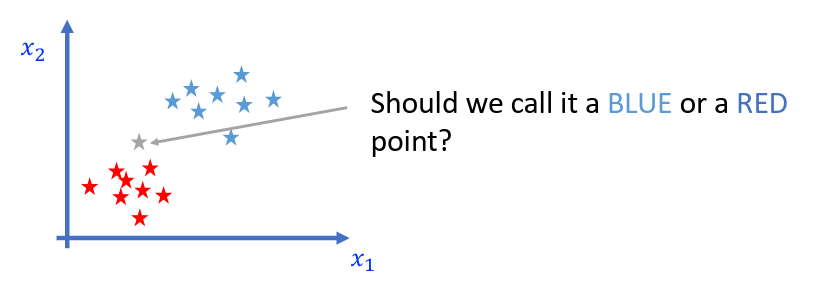

1. Find the example $(x^*, t^*)$ from the stored training set which is closest to $x$,  

   That is  

   $$
   x^* = \arg \min_{x^i \in train} \; distance(x^i, x)
   $$

2. Output: $y = t^*$


- In K Nearest Neighbors we consider k neighbors

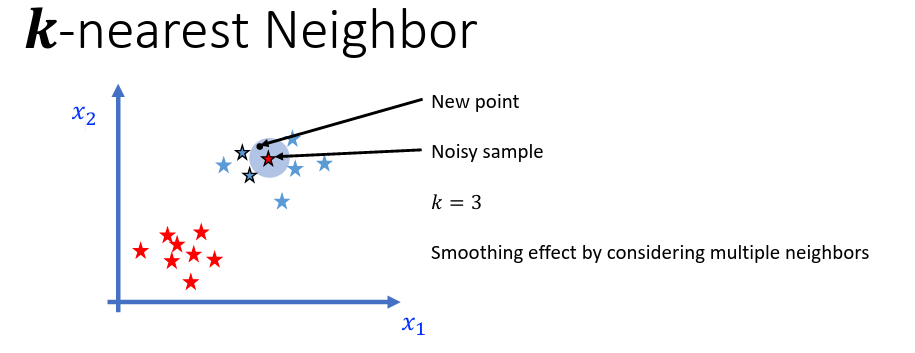 

- Step 1: choose a value for 𝑘 
- Step 2:Take the 𝑘 neighbors of the new data point according to Euclidean distance 
- Step 3:Among these 𝑘 neighbor data points, count the number of points in each category 
- Step 4:Assign the new data points to the category where you counted the most neighbors

#### Impact of 𝑘
 - Small 𝑘:
    - Good at capturing fine-grained paterns
    - May overfit  
 - Large 𝑘:
    - Makes stable prediction by averaging over a large number of neighbors
    - May underfit 
 - Balancing 𝑘: 
    - Optimal choice depend on the number of data points 𝑛 
    - Rule of thumb: 𝑘 < 𝑛 
    - Choose the optimal value using a validation set

#### Things to Remember about KNN
- Normalize data 
- Handle missing value

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Загружаем датасет
X, y = load_iris(return_X_y=True)

# Делим на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# KNN с k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Предсказания
y_pred = knn.predict(X_test)

# Метрики
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred))


KNN Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

KNN Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

